<a href="https://colab.research.google.com/github/VISHAL2077/PS_2025/blob/main/13_2_25_PS_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

count: [50 39 45 56 37 41 51 46]
pmf: [0.1369863  0.10684932 0.12328767 0.15342466 0.10136986 0.11232877
 0.13972603 0.1260274 ]
cdf: [0.1369863  0.24383562 0.36712329 0.52054795 0.62191781 0.73424658
 0.8739726  1.        ]


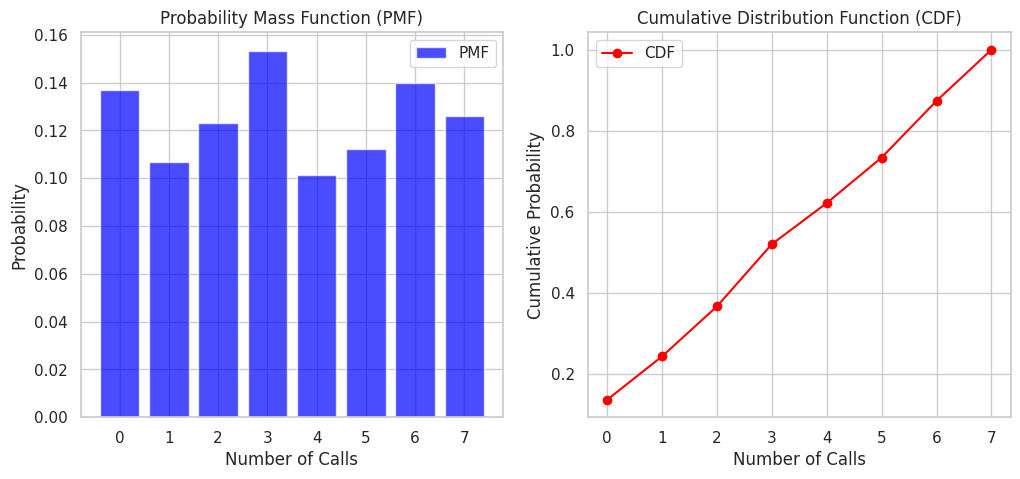

In [82]:
# Question 1: Generate dataset and compute PMF & CDF
def generate_calls_data(N):
    np.random.seed(42)
    calls_per_day = np.random.randint(0, 8, size=N)
    print (calls_per_day)
    return calls_per_day

def generate_calls_data(N):
    np.random.seed(42)
    calls_per_day = np.random.randint(0, 8, size=N)
    return calls_per_day

def plot_pmf_cdf(data):
    values, counts = np.unique(data, return_counts=True)
    full_range = np.arange(8)
    full_counts = np.zeros_like(full_range, dtype=int)
    full_counts[np.isin(full_range, values)] = counts
    pmf = full_counts / len(data)
    cdf = np.cumsum(pmf)

    print (f"count: {full_counts}")
    print (f"pmf: {pmf}")
    print (f"cdf: {cdf}")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.bar(full_range, pmf, alpha=0.7, color='blue', label='PMF')
    plt.xlabel("Number of Calls")
    plt.ylabel("Probability")
    plt.title("Probability Mass Function (PMF)")
    plt.xticks(full_range)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(full_range, cdf, marker='o', linestyle='-', color='red', label='CDF')
    plt.xlabel("Number of Calls")
    plt.ylabel("Cumulative Probability")
    plt.title("Cumulative Distribution Function (CDF)")
    plt.xticks(full_range)
    plt.legend()

    plt.show()

N = 365  # Number of days
data = generate_calls_data(N)
plot_pmf_cdf(data)

In [43]:
# Question 2: Binomial Distribution for Emergency Patients
p_surgery = 0.25
N_patients = 100

def compute_binomial_probabilities(N, p, k_values):
    probabilities = {k: binom.pmf(k, N, p) for k in k_values}
    return probabilities

def compute_cumulative_probability(N, p, k):
    return 1 - binom.cdf(k-1, N, p)

prob_20 = binom.pmf(20, N_patients, p_surgery)
print(f"Probability of exactly 20 patients needing surgery: {prob_20:.4f}")

prob_at_least_30 = compute_cumulative_probability(N_patients, p_surgery, 30)
print(f"Probability of at least 30 patients needing surgery: {prob_at_least_30:.4f}")

expected_patients = N_patients * p_surgery
print(f"Expected number of patients requiring surgery: {expected_patients}")

Probability of exactly 20 patients needing surgery: 0.0493
Probability of at least 30 patients needing surgery: 0.1495
Expected number of patients requiring surgery: 25.0


Normal Approximation - Probability of exactly 20 patients needing surgery: 0.0473
Normal Approximation - Probability of at least 30 patients needing surgery: 0.1493
Expected number of patients requiring surgery: 25.0


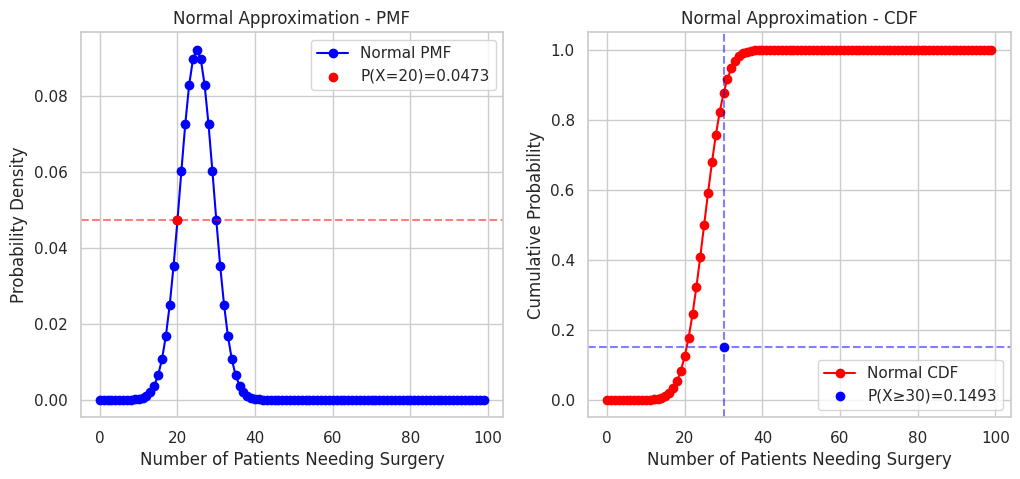

In [78]:
from scipy.stats import norm

N_patients = 100
p_surgery = 0.25

mu = N_patients * p_surgery
sigma = np.sqrt(N_patients * p_surgery * (1 - p_surgery))

def normal_pmf(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

def normal_cdf(x, mu, sigma):
    return norm.cdf(x, mu, sigma)

x_values = np.arange(0, 100, 1)
pmf_values = normal_pmf(x_values, mu, sigma)
cdf_values = normal_cdf(x_values, mu, sigma)

x_20 = 20
x_30 = 30

pmf_20 = normal_pmf(x_20, mu, sigma)

cdf_30_corrected = normal_cdf(x_30 + 0.5, mu, sigma)
prob_at_least_30 = 1 - normal_cdf(x_30 - 0.5, mu, sigma)

print(f"Normal Approximation - Probability of exactly 20 patients needing surgery: {pmf_20:.4f}")
print(f"Normal Approximation - Probability of at least 30 patients needing surgery: {prob_at_least_30:.4f}")
print(f"Expected number of patients requiring surgery: {mu:.1f}")

plt.figure(figsize=(12, 5))

# PMF Plot
plt.subplot(1, 2, 1)
plt.plot(x_values, pmf_values, marker='o', linestyle='-', color='blue', label='Normal PMF')
plt.scatter(x_20, pmf_20, color='red', zorder=3, label=f'P(X=20)={pmf_20:.4f}')
plt.axhline(pmf_20, color='red', linestyle='dashed', alpha=0.5)
plt.xlabel("Number of Patients Needing Surgery")
plt.ylabel("Probability Density")
plt.title("Normal Approximation - PMF")
plt.legend()

# CDF Plot
plt.subplot(1, 2, 2)
plt.plot(x_values, cdf_values, marker='o', linestyle='-', color='red', label='Normal CDF')

plt.scatter(x_30, prob_at_least_30, color='blue', zorder=3, label=f'P(X≥30)={prob_at_least_30:.4f}')
plt.axvline(x_30, color='blue', linestyle='dashed', alpha=0.5)
plt.axhline(prob_at_least_30, color='blue', linestyle='dashed', alpha=0.5)

plt.xlabel("Number of Patients Needing Surgery")
plt.ylabel("Cumulative Probability")
plt.title("Normal Approximation - CDF")
plt.legend()

plt.show()
